# Facial Expression Recognition Using CNN

### **Imports Libararies**.

Imports necessary libraries for building and training a convolutional neural network (CNN) for facial expression recognition.

- `os`: Provides functions for interacting with the operating system, useful for file operations.
- `cv2`: OpenCV library for computer vision tasks, used here for image processing.
- `numpy`: Library for numerical computing, used for array operations.
- `tensorflow`: TensorFlow library for deep learning.
- `train_test_split` from `sklearn.model_selection`: Splits data into training and testing sets.
- `Sequential` from `keras.models`: Linear stack of layers for building deep learning models.
- `Dense`, `Conv2D`, `Dropout`, `BatchNormalization`, `MaxPooling2D`, `Flatten` from `keras.layers`: Different types of layers used in the CNN architecture.
- Optimizers (`Adam`) from `keras.optimizers`: Algorithms used to update model weights during training.
- `plt` from `matplotlib.pyplot`: Library for creating visualizations, used here for plotting training/validation curves.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle                      
import cv2                                 
import tensorflow as tf                

#### This model recognizes 7 facial expressions

- Angry
- disgust
- fear
- happy
- neutral
- sad
- suprise


In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (50, 50)

def load_data():
    datasets = ['archive/images/train/']
    datasets2 = ['archive/images/validation/']
    
    images = []
    labels = []
    
    # Function to load images from a dataset
    def load_dataset(dataset_path):
        dataset_images = []
        dataset_labels = []
        
        for folder in os.listdir(dataset_path):
            label = class_names_label[folder]
            folder_path = os.path.join(dataset_path, folder)
            
            for file in tqdm(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, file)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
                image = cv2.resize(image, IMAGE_SIZE)
                
                dataset_images.append(image)
                dataset_labels.append(label)
        
        return np.array(dataset_images, dtype='float32'), np.array(dataset_labels, dtype='int32')
    
    # Load images and labels from training dataset
    for dataset in datasets:
        print("Loading training dataset from {}".format(dataset))
        dataset_images, dataset_labels = load_dataset(dataset)
        images.extend(dataset_images)
        labels.extend(dataset_labels)
    
    # Load images and labels from validation dataset
    for dataset in datasets2:
        print("Loading validation dataset from {}".format(dataset))
        dataset_images, dataset_labels = load_dataset(dataset)
        images.extend(dataset_images)
        labels.extend(dataset_labels)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

# Example usage:
images, labels = load_data()

print(f"Total images shape: {images.shape}")
print(f"Total labels shape: {labels.shape}")


Loading training dataset from archive/images/train/


100%|██████████| 3205/3205 [00:17<00:00, 179.97it/s]


Loading validation dataset from archive/images/validation/


100%|██████████| 797/797 [00:04<00:00, 176.89it/s]


Total images shape: (35887, 50, 50)
Total labels shape: (35887,)


In [3]:
permutation  = np.random.permutation(len(images))

shuffled_images = images[permutation]
shuffled_labels = labels[permutation]

In [4]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(shuffled_images, shuffled_labels, test_size=0.1, shuffle=True)

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((32298, 50, 50), (32298,), (3589, 50, 50), (3589,))

In [5]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

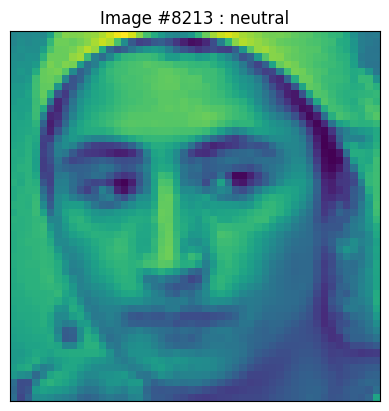

In [6]:
def display_random_image(class_names, images, labels):   
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()
    
display_random_image(class_names, train_images, train_labels)

In [14]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (50, 50, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 22, 22, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,527 (451.28 KB)

 Trainable params: 115,047 (449.40 KB)

 Non-trainable params: 480 (1.88 KB)

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
import os

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(48, 48, 1), name='conv2d_12'),
    BatchNormalization(name='batch_normalization_12'),
    MaxPooling2D((2, 2), name='max_pooling2d_12'),
    Dropout(0.25, name='dropout_15'),
    
    Conv2D(32, (3, 3), activation='relu', name='conv2d_13'),
    BatchNormalization(name='batch_normalization_13'),
    MaxPooling2D((2, 2), name='max_pooling2d_13'),
    Dropout(0.25, name='dropout_16'),
    
    Conv2D(64, (3, 3), activation='relu', name='conv2d_14'),
    BatchNormalization(name='batch_normalization_14'),
    MaxPooling2D((2, 2), name='max_pooling2d_14'),
    Dropout(0.25, name='dropout_17'),
    
    Conv2D(128, (3, 3), activation='relu', name='conv2d_15'),
    BatchNormalization(name='batch_normalization_15'),
    MaxPooling2D((2, 2), name='max_pooling2d_15'),
    Dropout(0.25, name='dropout_18'),
    
    Flatten(name='flatten_3'),
    Dense(128, activation='relu', name='dense_6'),
    Dropout(0.5, name='dropout_19'),
    Dense(7, activation='softmax', name='dense_7')
])

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

# Check if the file exists
if not os.path.exists('model_plot.png'):
    raise FileNotFoundError("Model plot image 'model_plot.png' not found. Check if plot_model function saved the image correctly.")




In [16]:
history = model2.fit(train_images, train_labels, epochs=52, validation_split = 0.1)

Epoch 1/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.2436 - loss: 1.9460 - val_accuracy: 0.3669 - val_loss: 1.6349
Epoch 2/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.3885 - loss: 1.5665 - val_accuracy: 0.4050 - val_loss: 1.5176
Epoch 3/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4465 - loss: 1.4454 - val_accuracy: 0.4845 - val_loss: 1.3607
Epoch 4/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4691 - loss: 1.3803 - val_accuracy: 0.4997 - val_loss: 1.3099
Epoch 5/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.4970 - loss: 1.3157 - val_accuracy: 0.4876 - val_loss: 1.3290
Epoch 6/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5046 - loss: 1.2921 - val_accuracy: 0.5003 - val_loss: 1.3337
Epoch 7/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5236 - loss: 1.2526 - val_accuracy: 0.5269 - val_loss: 1.2264
Epoch 8/52
909/909 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5289 - loss: 1.2368 - 

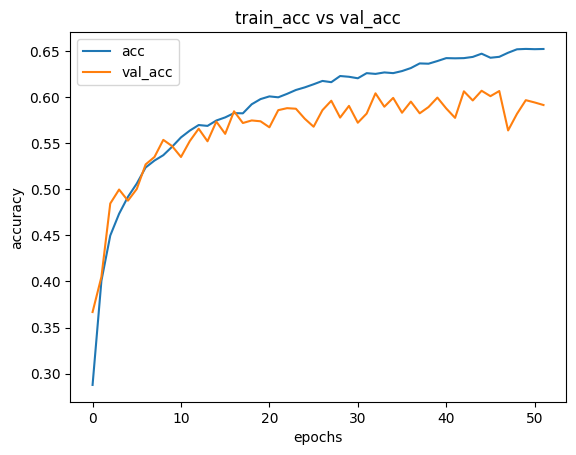

In [ ]:
plt.plot(history.history['accuracy'], label = "acc")
plt.plot(history.history['val_accuracy'], label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


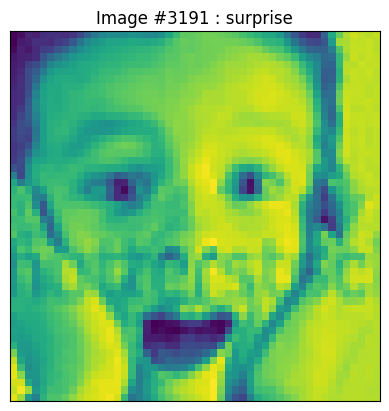

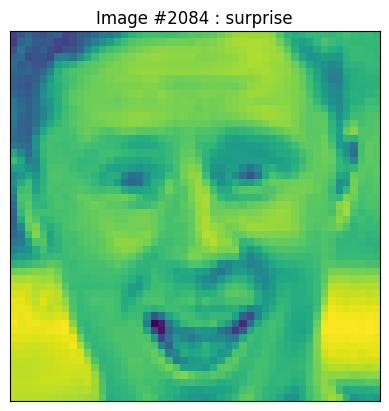

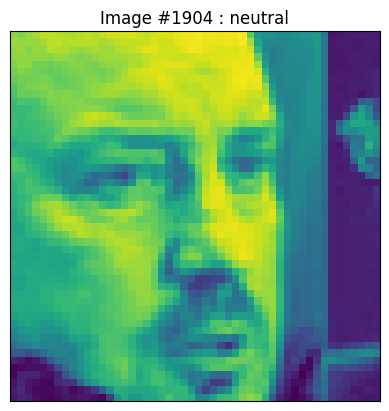

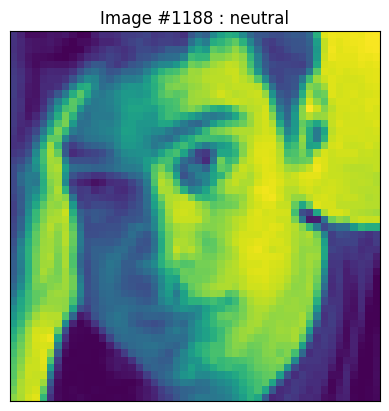

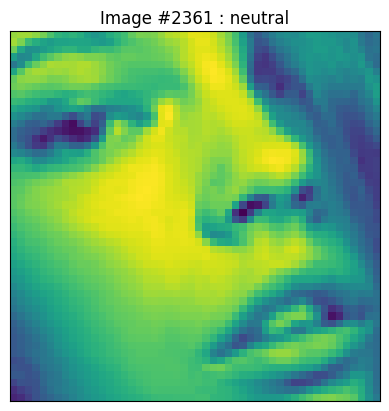

In [ ]:
predictions = model2.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

# Display predicted labels
for i in range(5):
    display_random_image(class_names, test_images, pred_labels) 


why Adam? 
- LR depends on avg of gradients (1st moment) and the variance of the gradients (2nd moment)
- Better than GD / RMSProp
- Used in Neural networks 
- Bias correction in both first and second moments.

In [ ]:
model2.save('my_model.h5')